In [1]:
import matplotlib.pyplot as plt

from matplotlib.ticker import MultipleLocator, FormatStrFormatter

import numpy as np

import pandas as pd

import os,sys

import copy

import h3

import branca.colormap as cmp

from shapely.geometry import Point, Polygon

import math

import random

import time

import datetime

import scipy.stats as stats

import warnings

warnings.filterwarnings('ignore')

## 01 Parameters

In [25]:
day='2020-12-01'

Order_df=pd.read_csv(os.path.join('Order_df_'+str(day)+'.csv'))

Order_df=Order_df.drop(columns=['Unnamed: 0'])

Driver_df=pd.read_csv(os.path.join('Driver_df_'+str(day)+'.csv'))

Driver_df=Driver_df.drop(columns=['Unnamed: 0'])

beta1=1.2

beta2=0.6

beta3=0.4

beta4=0.6



## 02 Passengers' utility

\begin{equation}
v_{o,d}^{i} = \frac{\beta_{1}\cdot T_{o}}{f_{o}^{i} + \tau_{o,d} \cdot \beta_{2}}
\end{equation}

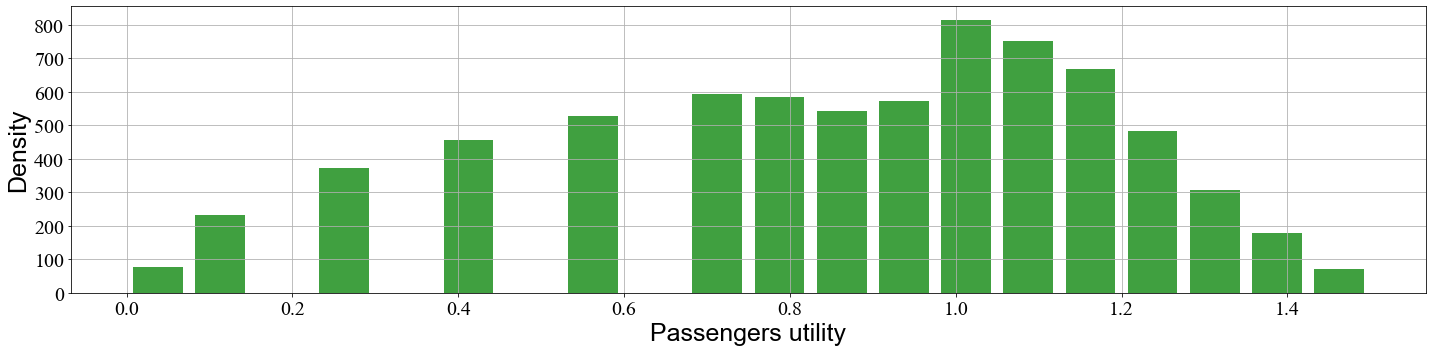

In [26]:
'''Take platform A as an example'''

'''

Speed=0.33 km/minute

Dispatching radius = 2km

Average Tau =  1 km / 0.33

'''

tau=3 #minute

Order_df['V']=Order_df.apply(lambda x:(x['Travel_minute']*beta1)/(x['Fare']+tau*beta2),axis=1)

Order_df


'''Plot'''

V=copy.deepcopy(np.array(Order_df['V'].to_list()))

'''Plot Figure'''

figsize = 20,5

font_title = {'family' : 'Arial','weight' : 'normal','size': 40}

font_label = {'family' : 'Arial','weight' : 'normal','size': 25}

font_legend = {'family' : 'Arial','weight' : 'normal','size': 20}

figure, axs = plt.subplots(figsize=figsize)

labels = axs.get_xticklabels() + axs.get_yticklabels()

[label.set_fontsize(20) for label in labels]

[label.set_fontname('Times New Roman') for label in labels]
    
    
    

'''Platform A'''

axs.hist(V,20,facecolor='g', alpha=0.75,rwidth=0.8)


axs.set_ylabel('Density',font_label)

axs.set_xlabel('Passengers utility',font_label)

axs.grid()


plt.tight_layout()

current_fig = plt.gcf() # 'get current figure'

plt.show()



## 03 Drivers' utility

\begin{equation}
u_{o,d}^{i} = \frac{(1-w_{d}^{i}) \cdot f_{o}^{i}  - \tau_{o,d} \cdot \beta_{3}}{\beta_{4}\cdot T_{o}}.
\end{equation}

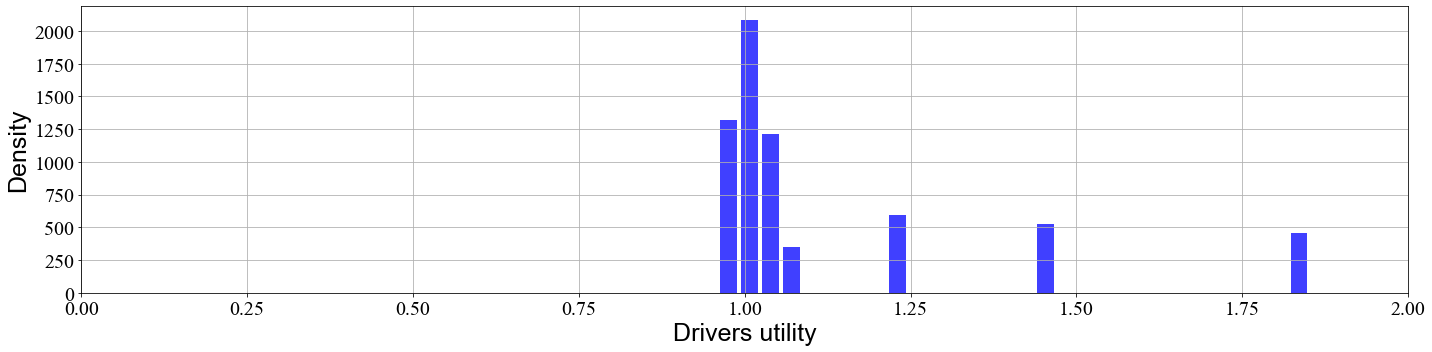

In [29]:
'''Take platform A as an example'''

'''

Speed=0.33 km/minute

Dispatching radius = 2km

Average Tau =  1 km / 0.33

'''

w=0.2

tau=3

Order_df['U']=Order_df.apply(lambda x:((1-w)*x['Fare']-beta3*tau)/((x['Travel_minute']+1)*beta4),axis=1)

Order_df


'''Plot'''

U=copy.deepcopy(np.array(Order_df['U'].to_list()))

'''Plot Figure'''

figsize = 20,5

font_title = {'family' : 'Arial','weight' : 'normal','size': 40}

font_label = {'family' : 'Arial','weight' : 'normal','size': 25}

font_legend = {'family' : 'Arial','weight' : 'normal','size': 20}

figure, axs = plt.subplots(figsize=figsize)

labels = axs.get_xticklabels() + axs.get_yticklabels()

[label.set_fontsize(20) for label in labels]

[label.set_fontname('Times New Roman') for label in labels]
    
    
    

'''Platform A'''

axs.hist(U,200,facecolor='b', alpha=0.75,rwidth=0.8)


axs.set_ylabel('Density',font_label)

axs.set_xlabel('Drivers utility',font_label)

axs.grid()

axs.set_xlim([0,2])


plt.tight_layout()

current_fig = plt.gcf() # 'get current figure'

plt.show()